## DepMap Analysis
We will be loading gene dependency data from DepMap and building functions to analyze mean dependency scores, cancer-specific dependencies, and dependency correlations for any gene of interest.

Learning outcomes:
- Working with large and complex datasets using pandas.
- Gaining experience with a typical data analysis workflow.
- Utilizing various commonly used pandas methods.

# Introduction to the DepMap Gene Dependency Dataset

The **Dependency Map (DepMap)** project is a comprehensive initiative aimed at identifying and cataloging the genetic dependencies of various cancer cell lines. By systematically perturbing genes across a wide array of cancer types, DepMap provides invaluable insights into which genes are essential for the survival and proliferation of specific cancer cells. This information is crucial for understanding cancer biology and for the development of targeted therapies.

## Gene Dependency Data

The **Gene Dependency dataset** from DepMap contains quantitative measures that indicate how essential each gene is for the viability of different cancer cell lines. Key components of the dataset include:

- **Cell Lines**: Representing a diverse set of cancer types, each cell line serves as a model to study the dependency on specific genes.
- **Gene Scores**: Numerical values that reflect the dependency level of a gene in a particular cell line. Typically, lower scores indicate higher dependency, meaning the gene is more critical for the cell's survival.
- **Gene Annotations**: Additional information about each gene, such as its biological function, involvement in pathways, and any known associations with diseases.


## What will we be doing with DepMap data?
We will be loading gene dependency data from DepMap and building functions to analyze for a given gene of interest:

1) mean dependency scores, 
2) cancer-specific dependencies
3) dependency correlations for any gene of interest.

## Learning outcomes:
- Working with large and complex datasets using pandas.
- Gaining experience with a typical data analysis workflow.
- Utilizing various commonly used pandas methods.

## Step 1 Data Import

Head to https://depmap.org/portal/.
Under downloads you will find a number of options.
We want the latest data for CRISPRGeneEffect.

In [2]:
import pandas as pd
df_crispr = pd.read_csv('https://plus.figshare.com/ndownloader/files/46489063')

The dataset consists of gene dependency data for each gene (columns) and over 1000 different
cell lines. The more negative the values, the more essential the gene.
These data are derived from barcode sequencing of lentiviral gRNA libraries at the time of infection
and after 2 weeks of expansion.
There are also a lot of correction steps done to produce the Gene Effect score.
If you are interested, look up the info on the DepMap website and read the papers.

In [3]:
df_crispr.head()

,Unnamed: 0,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,-0.134132,0.029103,0.016454,-0.137540,-0.047273,0.181367,-0.082437,-0.059023,0.194592,...,-0.123528,0.085140,0.181954,0.239474,0.172965,-0.230327,0.055657,0.044296,0.107361,-0.410449
1,ACH-000004,-0.001436,-0.080068,-0.125263,-0.027607,-0.053838,-0.151272,0.240094,-0.038922,0.186438,...,-0.186899,-0.359257,0.202271,0.057740,0.089295,0.086703,-0.304930,0.086858,0.254538,-0.087671
2,ACH-000005,-0.144940,0.026541,0.160605,0.088015,-0.202605,-0.243420,0.133726,-0.034895,-0.126105,...,-0.309668,-0.344502,-0.056160,-0.092447,-0.015550,-0.170380,-0.080934,-0.059685,0.030254,-0.145055
3,ACH-000007,-0.053334,-0.120420,0.047978,0.086984,-0.018987,-0.017309,-0.000041,-0.158419,-0.169559,...,-0.323038,-0.387265,-0.013816,0.183228,0.038424,-0.051728,-0.383499,-0.012801,-0.294771,-0.431575
4,ACH-000009,-0.027684,-0.144202,0.052846,0.073833,0.038823,-0.108149,0.010811,-0.088600,0.032194,...,-0.253057,-0.159965,-0.025342,0.191500,-0.071632,-0.077843,-0.525599,0.093219,-0.029515,-0.255204


In [4]:
df_crispr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Columns: 18444 entries, Unnamed: 0 to ZZZ3 (26009)
dtypes: float64(18443), object(1)
memory usage: 161.8+ MB


## Step 2 preparing the data for analysis
To perform our analysis, we need to annotate and clean the data.
The first column contains the cell line IDs. This is an internal identifier but doesn't tell us much about the individual cell lines.
We want to obtain the names and also the cancer types for each cell line. These data are stored in the models.csv file.

In [5]:
df_models = pd.read_csv("https://plus.figshare.com/ndownloader/files/46489732")
df_models.head()



,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,...,EngineeredModel,TissueOrigin,ModelDerivationMaterial,PublicComments,CCLEName,HCMIID,WTSIMasterCellID,SangerModelID,COSMICID,DateSharedIndbGaP
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,NaN,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,2201.0,SIDM00105,905933.0,NaN
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,NaN,NaN,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,55.0,SIDM00829,905938.0,NaN
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,...,NaN,NaN,NaN,NaN,CACO2_LARGE_INTESTINE,NaN,NaN,SIDM00891,NaN,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,NaN,NaN,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,783.0,SIDM00594,907053.0,NaN
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,NaN,NaN,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,SIDM00593,NaN,NaN


In [6]:
df_models.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ModelID                   1959 non-null   object 
 1   PatientID                 1959 non-null   object 
 2   CellLineName              1959 non-null   object 
 3   StrippedCellLineName      1959 non-null   object 
 4   DepmapModelType           1959 non-null   object 
 5   OncotreeLineage           1954 non-null   object 
 6   OncotreePrimaryDisease    1959 non-null   object 
 7   OncotreeSubtype           1959 non-null   object 
 8   OncotreeCode              1818 non-null   object 
 9   LegacyMolecularSubtype    151 non-null    object 
 10  LegacySubSubtype          831 non-null    object 
 11  PatientMolecularSubtype   138 non-null    object 
 12  RRID                      1887 non-null   object 
 13  Age                       1556 non-null   float64
 14  AgeCateg

The models file has 1959 columns, so there is not a clear correspndance between the two dfs. What we have to do now is match the between df_crispr and df_models and transfect the StrippedCellLineName and OncotreePrimaryDisease data over to the crispr data. Thsi will give us all the annotations we need.

In [7]:
# Rename and merge as before
df_crispr = df_crispr.rename(columns={'Unnamed: 0': 'ModelID'})
df_crispr_annotated = df_crispr.merge(
    df_models[['ModelID', 'StrippedCellLineName', 'OncotreePrimaryDisease']], 
    on='ModelID',
    how='left'
)

# Reorder columns to put the new columns at the start
new_column_order = ['ModelID', 'StrippedCellLineName', 'OncotreePrimaryDisease'] + [
    col for col in df_crispr_annotated.columns 
    if col not in ['ModelID', 'StrippedCellLineName', 'OncotreePrimaryDisease']
]
df_crispr_annotated = df_crispr_annotated.reindex(columns=new_column_order)
df_crispr_annotated.head()


,ModelID,StrippedCellLineName,OncotreePrimaryDisease,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,NIHOVCAR3,Ovarian Epithelial Tumor,-0.134132,0.029103,0.016454,-0.137540,-0.047273,0.181367,-0.082437,...,-0.123528,0.085140,0.181954,0.239474,0.172965,-0.230327,0.055657,0.044296,0.107361,-0.410449
1,ACH-000004,HEL,Acute Myeloid Leukemia,-0.001436,-0.080068,-0.125263,-0.027607,-0.053838,-0.151272,0.240094,...,-0.186899,-0.359257,0.202271,0.057740,0.089295,0.086703,-0.304930,0.086858,0.254538,-0.087671
2,ACH-000005,HEL9217,Acute Myeloid Leukemia,-0.144940,0.026541,0.160605,0.088015,-0.202605,-0.243420,0.133726,...,-0.309668,-0.344502,-0.056160,-0.092447,-0.015550,-0.170380,-0.080934,-0.059685,0.030254,-0.145055
3,ACH-000007,LS513,Colorectal Adenocarcinoma,-0.053334,-0.120420,0.047978,0.086984,-0.018987,-0.017309,-0.000041,...,-0.323038,-0.387265,-0.013816,0.183228,0.038424,-0.051728,-0.383499,-0.012801,-0.294771,-0.431575
4,ACH-000009,C2BBE1,Colorectal Adenocarcinoma,-0.027684,-0.144202,0.052846,0.073833,0.038823,-0.108149,0.010811,...,-0.253057,-0.159965,-0.025342,0.191500,-0.071632,-0.077843,-0.525599,0.093219,-0.029515,-0.255204


The gene_names are a string followed by a space and a number in () like A1BG (1). We want need to get rid of the (1) to make the df searchable.
We can us the str.split method for this.

In [8]:
df_crispr_annotated.columns = [col.split(" ")[0] for col in df_crispr_annotated.columns]
df_crispr_annotated.head()

,ModelID,StrippedCellLineName,OncotreePrimaryDisease,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,ACH-000001,NIHOVCAR3,Ovarian Epithelial Tumor,-0.134132,0.029103,0.016454,-0.137540,-0.047273,0.181367,-0.082437,...,-0.123528,0.085140,0.181954,0.239474,0.172965,-0.230327,0.055657,0.044296,0.107361,-0.410449
1,ACH-000004,HEL,Acute Myeloid Leukemia,-0.001436,-0.080068,-0.125263,-0.027607,-0.053838,-0.151272,0.240094,...,-0.186899,-0.359257,0.202271,0.057740,0.089295,0.086703,-0.304930,0.086858,0.254538,-0.087671
2,ACH-000005,HEL9217,Acute Myeloid Leukemia,-0.144940,0.026541,0.160605,0.088015,-0.202605,-0.243420,0.133726,...,-0.309668,-0.344502,-0.056160,-0.092447,-0.015550,-0.170380,-0.080934,-0.059685,0.030254,-0.145055
3,ACH-000007,LS513,Colorectal Adenocarcinoma,-0.053334,-0.120420,0.047978,0.086984,-0.018987,-0.017309,-0.000041,...,-0.323038,-0.387265,-0.013816,0.183228,0.038424,-0.051728,-0.383499,-0.012801,-0.294771,-0.431575
4,ACH-000009,C2BBE1,Colorectal Adenocarcinoma,-0.027684,-0.144202,0.052846,0.073833,0.038823,-0.108149,0.010811,...,-0.253057,-0.159965,-0.025342,0.191500,-0.071632,-0.077843,-0.525599,0.093219,-0.029515,-0.255204


The last thing we have to do is to eliminate columns with NaNs. This would mess up our pearson correlation analysis.
There are different ways to deal with Nans, like imputing a median value or the value of the neighbouring column.
As a first step lets just check how many genes have NaN values

In [9]:
df = df_crispr_annotated.copy()

In [10]:
# Count NaN values for each gene
nan_genes = len([gene for gene in df.columns if df[gene].isna().sum() > 0])
print(f"There are {nan_genes} genes with NaNs")

There are 1336 genes with NaNs


In [11]:
df_cleaned = df.dropna(axis=1)

## Step 2: Get the mean dependency scores for a gene of interest

This should be easy now. We just search for a gene and calculate the stats for the pandas series with the gene effect scores for each cell line
    

In [12]:
GOI = 'ATR'
df_cleaned[GOI].describe()


count    1150.000000
mean       -1.314921
std         0.267091
min        -2.437428
25%        -1.463951
50%        -1.316015
75%        -1.180696
max         0.319273
Name: ATR, dtype: float64

## Step 3 Check which are the most sensitive and resistant tumor types for our GOI

For this we will use one of the most powerful features pandas has to offer, which is the groupby function. We need to group
our data for the GOI by the cancer type and calculate the mean
then sort from smallest to largest. At the beginning will be the sensitive tumors and at the end the resistant tumors.

In [13]:
cancer_dependencies = df_cleaned.groupby('OncotreePrimaryDisease')[GOI].mean().sort_values()

In [14]:
cancer_dependencies.sort_values(ascending=True)

OncotreePrimaryDisease
Squamous Cell Carcinoma of the Vulva/Vagina                     -1.851579
Chondrosarcoma                                                  -1.765549
Mucosal Melanoma of the Vulva/Vagina                            -1.647613
Retinoblastoma                                                  -1.541944
Nerve Sheath Tumor                                              -1.515771
                                                                   ...   
Breast Neoplasm, NOS                                            -0.863184
Head and Neck Carcinoma, Other                                  -0.802254
Ovarian Germ Cell Tumor                                         -0.800593
Hepatocellular Carcinoma plus Intrahepatic Cholangiocarcinoma   -0.725688
Sarcoma, NOS                                                    -0.601986
Name: ATR, Length: 75, dtype: float64

It would be good to also know how many samples per tumour type we have. So we want to combine mean and count. For this groupy has an agg function

In [15]:
cancer_dependencies = df_cleaned.groupby('OncotreePrimaryDisease')[GOI].agg(['mean', 'count']).sort_values(by='mean')
cancer_dependencies

,mean,count
OncotreePrimaryDisease,,
Squamous Cell Carcinoma of the Vulva/Vagina,-1.851579,1
Chondrosarcoma,-1.765549,1
Mucosal Melanoma of the Vulva/Vagina,-1.647613,1
Retinoblastoma,-1.541944,2
Nerve Sheath Tumor,-1.515771,5
...,...,...
"Breast Neoplasm, NOS",-0.863184,1
"Head and Neck Carcinoma, Other",-0.802254,1
Ovarian Germ Cell Tumor,-0.800593,1


## Step 4: Pearson Correlation Analysis
Finding the genes that show the most significant correlation in their gene effect distribution compared to the gene of interest (GOI).
The assumption here is that genes that show a similar pattern of dependencies should be functionally related.
For example, for ATR, we know that ATRIP is a close interactor and is required for ATR activation.

In [16]:
# Calculate correlations between GOI and all other genes
GOI = 'ATR'

# Get numeric columns only (exclude metadata columns)
numeric_cols = df_cleaned.drop(['ModelID', 'StrippedCellLineName', 'OncotreePrimaryDisease'], axis=1).columns

# Calculate correlations
correlations = {}
for gene in numeric_cols:
    if gene != GOI:
        correlation = df_cleaned[GOI].corr(df_cleaned[gene])
        correlations[gene] = correlation

# Convert to a Series and sort by absolute correlation value
correlations = pd.Series(correlations)
correlations_sorted = correlations.sort_values(ascending=False)

# Show top correlations
print("Top 10 most correlated genes:")
print(correlations_sorted[:10])

print("\nTop 10 most anti-correlated genes:")
print(correlations_sorted[-10:])

Top 10 most correlated genes:
ATRIP     0.464125
TOPBP1    0.234232
CHEK1     0.232858
RAD1      0.224208
RAD17     0.217517
KNSTRN    0.216400
HUS1      0.208853
TAF2      0.208808
RPAIN     0.208490
RFC5      0.202537
dtype: float64

Top 10 most anti-correlated genes:
MOGAT3     -0.151686
APOA1      -0.153272
CA5A       -0.157369
GSTM2      -0.158409
CYP2A13    -0.159291
UBQLN4     -0.159950
UBA52      -0.160165
CFB        -0.160920
KRTAP4-2   -0.173811
SPEF1      -0.185688
dtype: float64


## Plotting with Pandas
We will cover plotting in the next session, but for now, it's good to know that pandas comes with 
its own plotting functionality.
Below is an example of how this looks to visualize the ATR/ATRIP correlation.

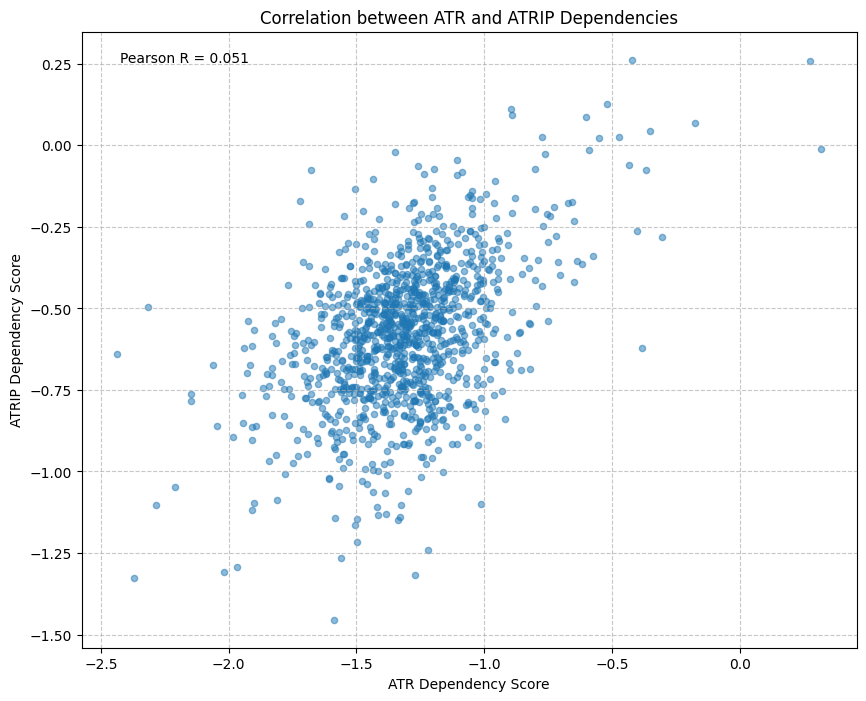

In [21]:


ax = df_cleaned.plot.scatter(
    x="ATR",
    y="ATRIP",
    figsize=(10, 8),
    alpha=0.5,  # Add some transparency to better see overlapping points
)

# Customize the plot
ax.set_title("Correlation between ATR and ATRIP Dependencies", fontsize=12)
ax.set_xlabel("ATR Dependency Score", fontsize=10)
ax.set_ylabel("ATRIP Dependency Score", fontsize=10)

# Add correlation coefficient to the plot
correlation = df_cleaned["ATR"].corr(df_cleaned["ATM"])
ax.text(
    0.05, 0.95, f"Pearson R = {correlation:.3f}", transform=ax.transAxes, fontsize=10
)

# Optional: Add a grid for better readability
ax.grid(True, linestyle="--", alpha=0.7)
